### Data Collection and preparation:

In [1]:
# !pip install yfinance
import yfinance as yf
import pandas as pd

# Define stock indices and date range
indices = {
    "SENSEX": "^BSESN",
    "SP500": "^GSPC"  # Renamed key to avoid invalid characters in filename
}

start_date = "2020-01-01"
end_date = "2025-01-01"

# Download data
data = {}
for name, ticker in indices.items():
    print(f"Downloading {name} data...")
    df = yf.download(ticker, start=start_date, end=end_date)
    data[name] = df

    # Save to CSV
    filename = f"{name}_5yr_data.csv"
    df.to_csv(filename)
    print(f"Saved to {filename} with {len(df)} rows.")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Saved to SENSEX_5yr_data.csv with 1234 rows.


[*********************100%***********************]  1 of 1 completed

Saved to SP500_5yr_data.csv with 1258 rows.


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("SENSEX_5yr_data.csv")
# df=pd.read_csv("SP500_5yr_data.csv")
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,41626.640625,41649.2890625,41328.44921875,41340.26953125,5300
3,2020-01-03,41464.609375,41636.1796875,41348.6796875,41634.51171875,8900
4,2020-01-06,40676.62890625,41378.33984375,40613.9609375,41378.33984375,8700


In [4]:
df.shape

(1236, 6)

In [5]:
df=pd.read_csv("SENSEX_5yr_data.csv")
df=df.rename(columns={df.columns[0]: 'Date'})
df = df.drop(index=[0,1])
df.to_csv("SENSEX_5yr_data.csv", index=False)

df.head()

,Date,Close,High,Low,Open,Volume
2,2020-01-02,41626.640625,41649.2890625,41328.44921875,41340.26953125,5300
3,2020-01-03,41464.609375,41636.1796875,41348.6796875,41634.51171875,8900
4,2020-01-06,40676.62890625,41378.33984375,40613.9609375,41378.33984375,8700
5,2020-01-07,40869.46875,41230.140625,40727.37109375,40983.0390625,11900
6,2020-01-08,40817.73828125,40866.359375,40476.55078125,40574.828125,18200


In [6]:
df=pd.read_csv("SP500_5yr_data.csv")
df=df.rename(columns={df.columns[0]: 'Date'})
df = df.drop(index=[0,1])
df.to_csv("SP500_5yr_data.csv", index=False)

df.head()

,Date,Close,High,Low,Open,Volume
2,2020-01-02,3257.85009765625,3258.139892578125,3235.530029296875,3244.669921875,3459930000
3,2020-01-03,3234.85009765625,3246.14990234375,3222.340087890625,3226.360107421875,3484700000
4,2020-01-06,3246.280029296875,3246.840087890625,3214.639892578125,3217.550048828125,3702460000
5,2020-01-07,3237.179931640625,3244.909912109375,3232.429931640625,3241.860107421875,3435910000
6,2020-01-08,3253.050048828125,3267.070068359375,3236.669921875,3238.590087890625,3726840000


In [7]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 2 to 1259
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1258 non-null   object
 1   Close   1258 non-null   object
 2   High    1258 non-null   object
 3   Low     1258 non-null   object
 4   Open    1258 non-null   object
 5   Volume  1258 non-null   object
dtypes: object(6)
memory usage: 59.1+ KB


### convert the Date into datetime formate (this is crucial for time series analysis)

In [10]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as index (important for time series analysis)
df.set_index("Date", inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1258 non-null   object
 1   High    1258 non-null   object
 2   Low     1258 non-null   object
 3   Open    1258 non-null   object
 4   Volume  1258 non-null   object
dtypes: object(5)
memory usage: 59.0+ KB


In [12]:
df.dtypes

Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [25]:
# df=pd.read_csv("SENSEX_5yr_data.csv")
df=pd.read_csv("SP500_5yr_data.csv")
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set the Date column as index (important for time series analysis)
df.set_index("Date", inplace=True)


### Making 6 Technical indicators which will be used as input features in the model by defining a function.

In [39]:
def compute_technical_indicators(df, ma_period=14, macd_short=12, macd_long=26, macd_signal=9, stochastic_period=14, rsi_period=14):


    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    # Simple Moving Average (SMA)
    df["SMA"] = df["Close"].rolling(window=ma_period).mean()

    # Moving Average Convergence Divergence (MACD)
    short_ema = df["Close"].ewm(span=macd_short, adjust=False).mean()
    long_ema = df["Close"].ewm(span=macd_long, adjust=False).mean()
    df["MACD"] = short_ema - long_ema
    df["MACD_Signal"] = df["MACD"].ewm(span=macd_signal, adjust=False).mean()

    # Stochastic KD (Stochastic Oscillator)
    df["Lowest_Low"] = df["Low"].rolling(window=stochastic_period).min()
    df["Highest_High"] = df["High"].rolling(window=stochastic_period).max()
    df["%K"] = 100 * ((df["Close"] - df["Lowest_Low"]) / (df["Highest_High"] - df["Lowest_Low"]))
    df["%D"] = df["%K"].rolling(window=3).mean()  # 3-day moving average of %K

    # Relative Strength Index (RSI)
    delta = df["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
    rs = gain / loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # Larry Williams’ %R
    df["Williams %R"] = -100 * ((df["Highest_High"] - df["Close"]) / (df["Highest_High"] - df["Lowest_Low"]))

    # Drop intermediate columns
    df.drop(columns=["Lowest_Low", "Highest_High"], inplace=True)

    return df


df = pd.read_csv("SENSEX_5yr_data.csv")
# df=pd.read_csv("SP500_5yr_data.csv")
df = compute_technical_indicators(df)

df.to_csv("SENSEX_technical_indicators.csv", index=False)

# df.to_csv("SP500_technical_indicators.csv", index=False)


### After Creating the Technical indicators there are lot of NaN values, you need to remove this.

In [27]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R
0,2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000,NaN,-1.834758,-0.366952,NaN,NaN,NaN,NaN
2,2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000,NaN,-2.339548,-0.761471,NaN,NaN,NaN,NaN
3,2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000,NaN,-3.434311,-1.296039,NaN,NaN,NaN,NaN
4,2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000,NaN,-2.986901,-1.634211,NaN,NaN,NaN,NaN


In [28]:
df.isnull().sum()

Date            0
Close           0
High            0
Low             0
Open            0
Volume          0
SMA            13
MACD            0
MACD_Signal     0
%K             13
%D             15
RSI            13
Williams %R    13
dtype: int64

In [30]:
df=pd.read_csv("SENSEX_technical_indicators.csv")
# df=pd.read_csv("SP500_technical_indicators.csv")
df.dropna(inplace=True)
df.to_csv("SENSEX_cleaned.csv", index=False)
# df.to_csv("SP500_cleaned.csv", index=False)

In [32]:
df=pd.read_csv("SENSEX_cleaned.csv")
# df=pd.read_csv("SP500_cleaned.csv")
# df.head()
df.isnull().sum()

Date           0
Close          0
High           0
Low            0
Open           0
Volume         0
SMA            0
MACD           0
MACD_Signal    0
%K             0
%D             0
RSI            0
Williams %R    0
dtype: int64

#### Direction column has been added to check whether the stock will go up or down 1 and 0 respectively.

In [40]:
df = pd.read_csv("SENSEX_cleaned.csv")
# df=pd.read_csv("SP500_cleaned.csv")
# Computing the Direction (1 = Up, 0 = Down)
df["Direction"] = (df["Close"].diff() > 0).astype(int)

# Remove the first row since it has NaN in Direction
df = df.dropna().reset_index(drop=True)

# Save updated data
df.to_csv("SENSEX_with_direction.csv", index=False)
# df.to_csv("SP500_with_direction.csv", index=False)

In [41]:
import pandas as pd

# Load your dataset (replace with your actual file path)
df = pd.read_csv("SENSEX_with_direction.csv")
# df = pd.read_csv("SP500_with_direction.csv")

# Count 0s and 1s in the 'Direction' column
counts = df['Direction'].value_counts()

print(counts)


Direction
1    666
0    553
Name: count, dtype: int64


In [35]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R,Direction
0,2020-01-23,41386.398438,41413.960938,41098.910156,41191.500000,9900,41452.384487,-26.999769,-3.172559,50.622454,44.435292,48.856897,-49.377546,0
1,2020-01-24,41613.191406,41697.031250,41275.601562,41377.039062,6600,41519.281808,-16.334852,-5.805018,63.240849,49.802223,66.374589,-36.759151,1
2,2020-01-27,41155.121094,41516.269531,41122.480469,41510.679688,7000,41539.685547,-44.334217,-13.510858,37.754556,50.539287,54.570386,-62.245444,0
3,2020-01-28,40966.859375,41333.250000,40869.750000,41299.679688,9800,41550.337054,-80.783837,-26.965453,6.916026,35.970477,52.286035,-93.083974,0
4,2020-01-29,41198.660156,41334.859375,41108.191406,41131.570312,7800,41532.216239,-89.929387,-39.558240,23.424629,22.698404,45.562902,-76.575371,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1219 non-null   object 
 1   Close        1219 non-null   float64
 2   High         1219 non-null   float64
 3   Low          1219 non-null   float64
 4   Open         1219 non-null   float64
 5   Volume       1219 non-null   int64  
 6   SMA          1219 non-null   float64
 7   MACD         1219 non-null   float64
 8   MACD_Signal  1219 non-null   float64
 9   %K           1219 non-null   float64
 10  %D           1219 non-null   float64
 11  RSI          1219 non-null   float64
 12  Williams %R  1219 non-null   float64
 13  Direction    1219 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 133.5+ KB


### Correlation Matrix

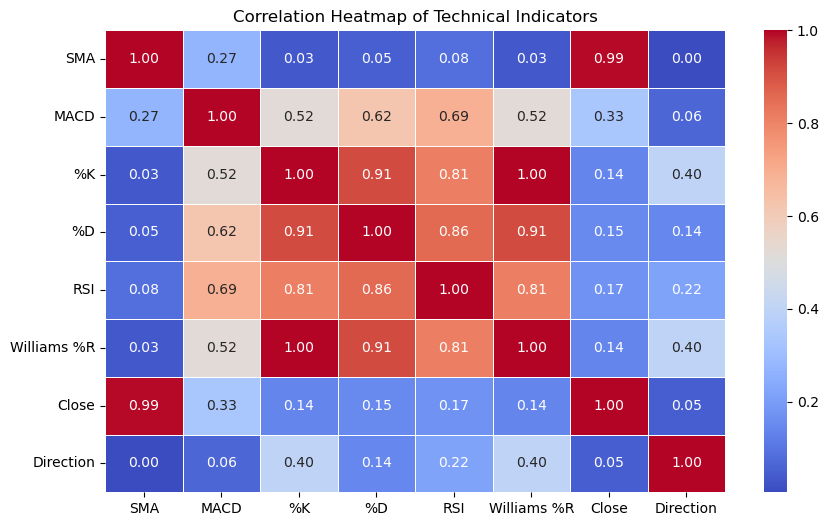

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("SP500_with_direction.csv")

tech_indicators = ["SMA", "MACD", "%K", "%D", "RSI", "Williams %R","Close","Direction"]
df[tech_indicators].corr()
# Compute the correlation matrix
corr_matrix = df[tech_indicators].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Heatmap of Technical Indicators")
plt.show()


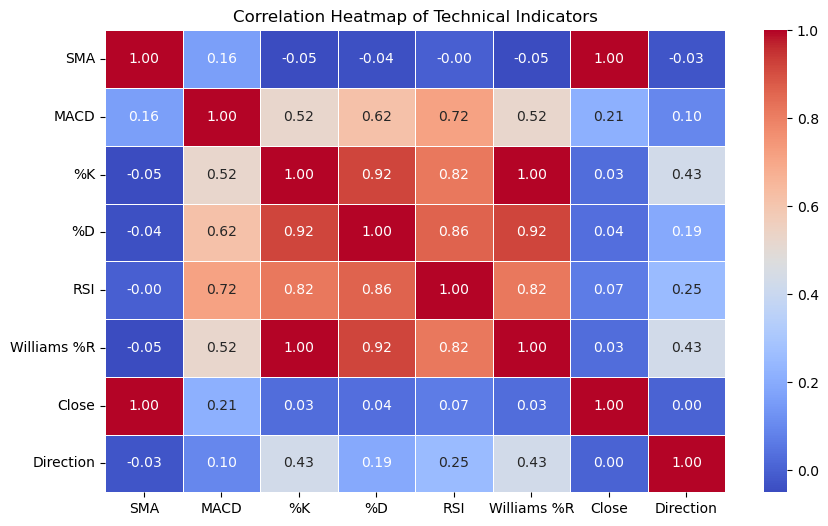

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("SENSEX_with_direction.csv")

tech_indicators = ["SMA", "MACD", "%K", "%D", "RSI", "Williams %R","Close","Direction"]
df[tech_indicators].corr()
# Compute the correlation matrix
corr_matrix = df[tech_indicators].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Heatmap of Technical Indicators")
plt.show()

### Trading Volume Over Time:

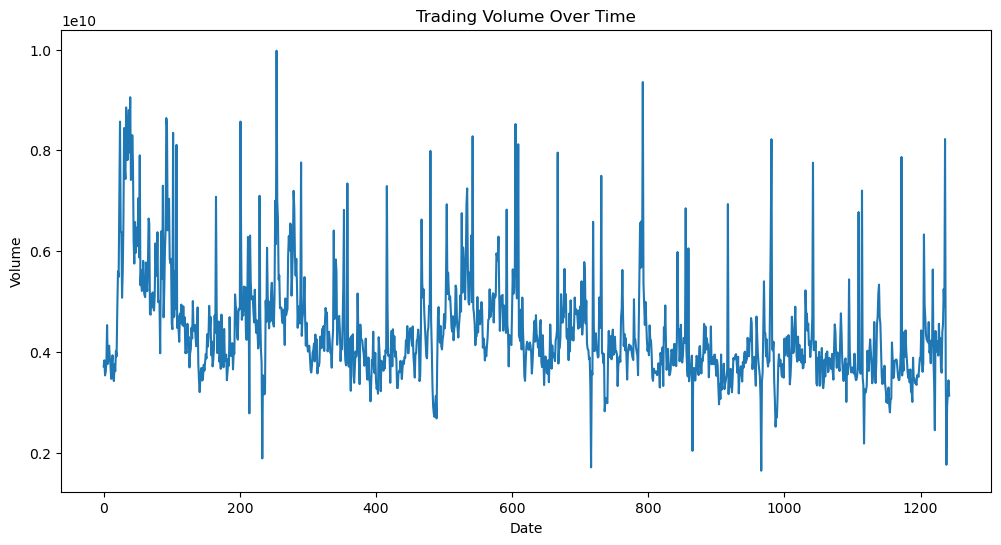

In [50]:
# df = pd.read_csv("SENSEX_with_direction.csv")
df = pd.read_csv("SP500_with_direction.csv")
plt.figure(figsize=(12, 6))
plt.plot(df["Volume"])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### Seasonality

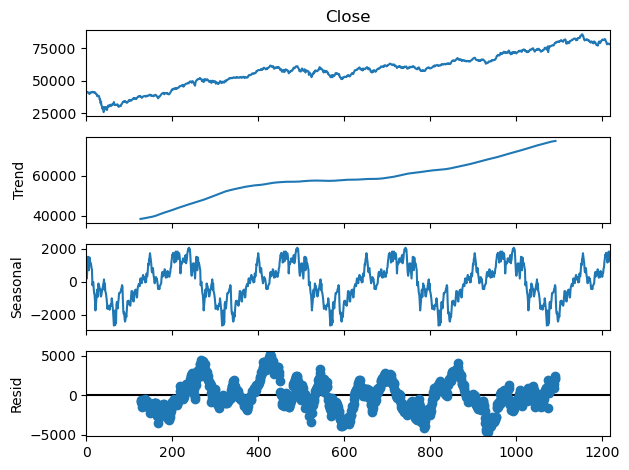

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["Close"], period=252)  # 252 trading days in a year
decomposition.plot()
plt.show()

### Autocorrelation Function (ACF):

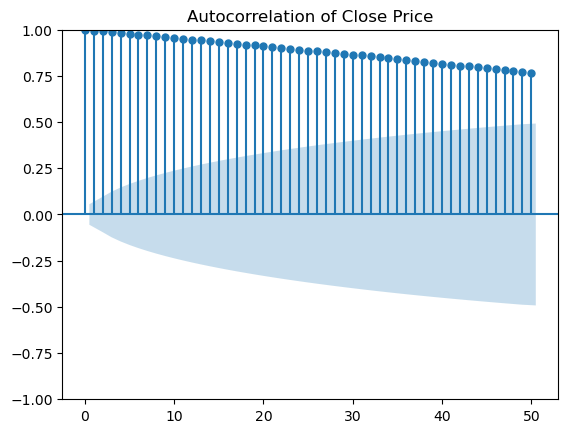

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Close"], lags=50)
plt.title("Autocorrelation of Close Price")
plt.show()

### Periodogram:

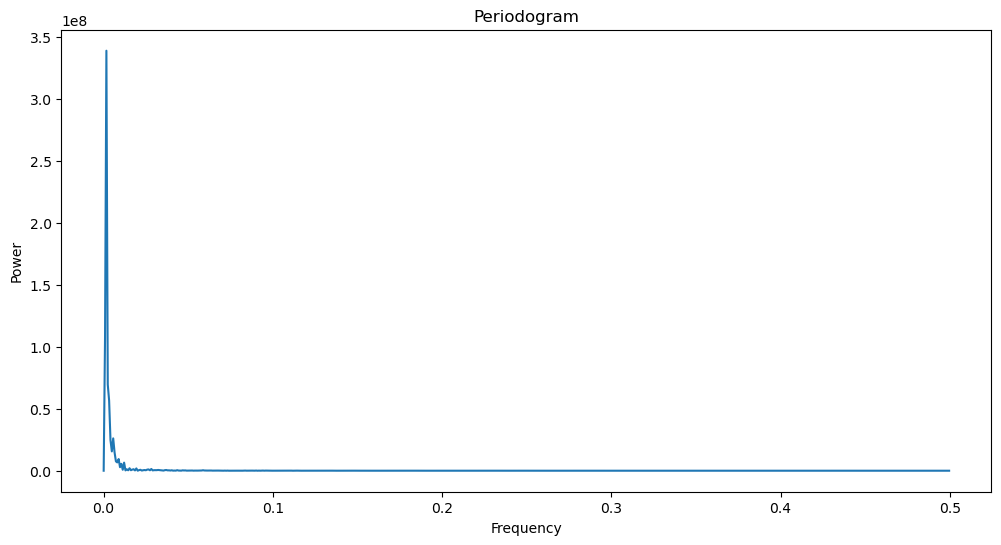

In [45]:
from scipy.signal import periodogram
frequencies, spectrum = periodogram(df["Close"])
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

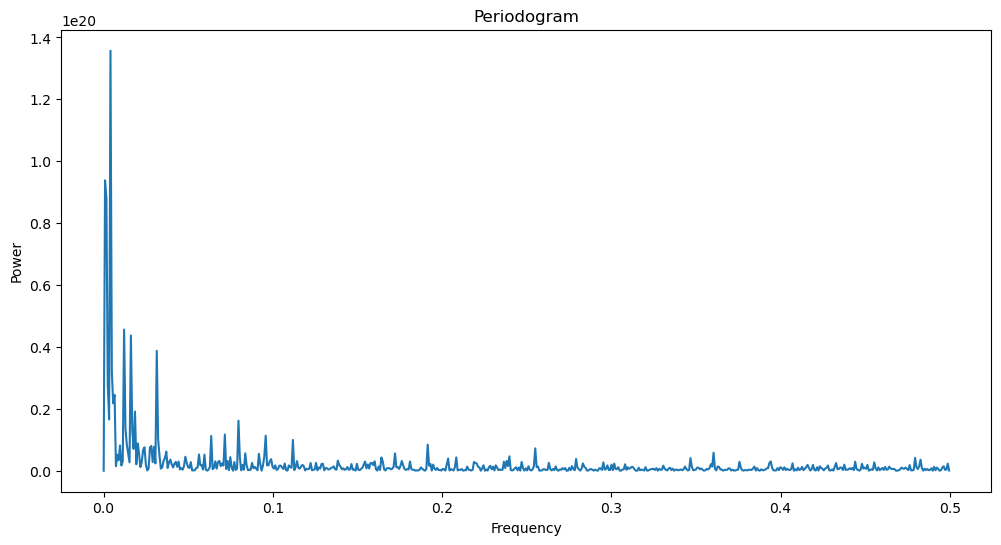

In [46]:
from scipy.signal import periodogram
frequencies, spectrum = periodogram(df["Volume"])
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

### Stationacity checking:

In [47]:
split = int(len(df) * 0.6)
mean1, mean2 = df["Close"][:split].mean(), df["Close"][split:].mean()
var1, var2 = df["Close"][:split].var(), df["Close"][split:].var()
print(f"Mean 1: {mean1}, Mean 2: {mean2}")
print(f"Variance 1: {var1}, Variance 2: {var2}")

Mean 1: 3873.6561893744756, Mean 2: 4866.400240610881
Variance 1: 301388.4846717716, Variance 2: 417407.70179349906


### Augmented Dickey-Fuller (ADF) Test:

* A statistical test to check for stationarity.
* Null Hypothesis: The time series is non-stationary.
* If the p-value is less than a significance level (e.g., 0.05), reject the null hypothesis and conclude the series is stationary.

In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["Close"])
# print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
# print("Critical Values:")
# for key, value in result[4].items():
#     print(f"{key}: {value}")

p-value: 0.878925599297323


### Hypotheses of the KPSS Test

* Null Hypothesis (H₀): The time series is stationary (trend-stationary).
* Alternative Hypothesis (H₁): The time series is non-stationary (has a unit root).

* If the p-value is low (typically < 0.05), we reject the null hypothesis and conclude that the series is non-stationary.

In [19]:
from statsmodels.tsa.stattools import kpss
kpss_stat, p_value, lags, critical_values = kpss(df["Close"])

# Print results
# print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
# print(f'Critical Values: {critical_values}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The series is likely non-stationary.")
else:
    print("Fail to reject the null hypothesis: The series is likely stationary.")

p-value: 0.01
Reject the null hypothesis: The series is likely non-stationary.


/var/folders/3h/zdcfhckx6rv5l6jqcnn6184r0000gn/T/ipykernel_29539/1612582508.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(df["Close"])


1. SMA_n​= ∑​CP(i)/n

where:

* SMA_n = Simple Moving Average for n periods
* CP(i) = Closing price at day i
* n = Number of periods


SMA smooths out price data to identify trends. A short-term SMA (e.g., 14-day) reacts quickly to price changes, while a long-term SMA (e.g., 50-day, 200-day) reacts slowly and identifies long-term trends.

In [56]:
import pandas as pd
import plotly.graph_objects as go

# Load data with computed indicators?
# df = pd.read_csv("SENSEX_with_direction.csv")  
df = pd.read_csv("SP500_with_direction.csv")




# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)  # Set Date as index for plotting

# Closing Price with SMA
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df.index, y=df["Close"], mode="lines", name="Closing Price", line=dict(color="blue")))
fig1.add_trace(go.Scatter(x=df.index, y=df["SMA"], mode="lines", name="SMA (14-day)", line=dict(color="orange", dash="dash")))
fig1.update_layout(
    title="Closing Price with Simple Moving Average (SMA)",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Indicator",
    template="plotly_white"
)
fig1.show()



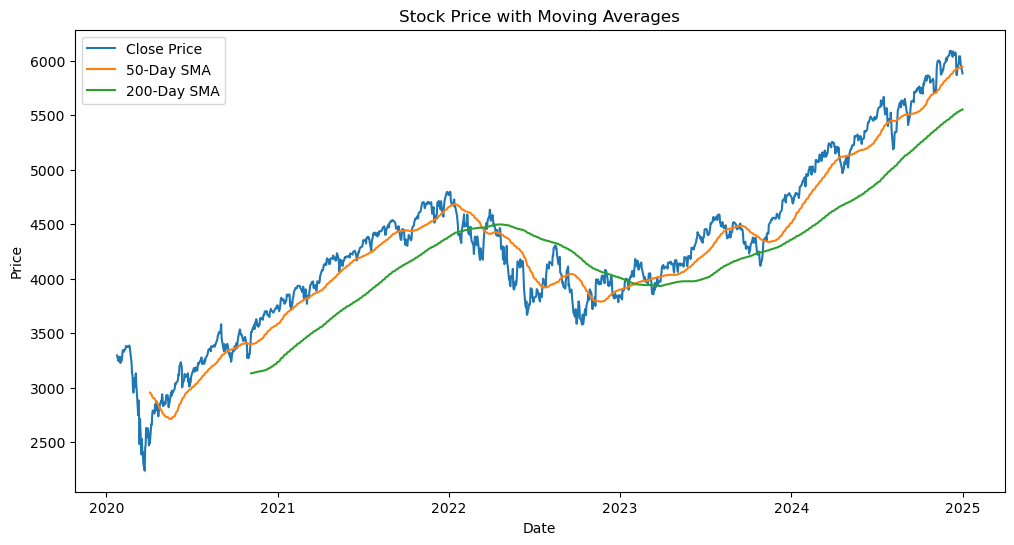

In [27]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["SMA_50"], label="50-Day SMA")
plt.plot(df["SMA_200"], label="200-Day SMA")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### $ MACD=EMA_{12}−EMA_{26} $

$ EMA(i)=(CP(i)−EMA(i−1))×Multiplier+EMA(i−1)$
<!-- * EMA(i)=(CP(i)−EMA(i−1))×Multiplier+EMA(i−1) -->
* EMA(i) = Exponential Moving Average at day i
* Multiplier = 2/(n+1)
* MACD = Difference between the 12-day EMA and 26-day EMA
* Signal Line = 9-day EMA of the MACD


MACD shows the relationship between two EMAs and helps identify bullish or bearish trends. A MACD crossing above the signal line suggests a buy signal, while crossing below suggests a sell signal.

In [57]:
# MACD & Signal Line
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df.index, y=df["MACD"], mode="lines", name="MACD", line=dict(color="green")))
fig2.add_trace(go.Scatter(x=df.index, y=df["MACD_Signal"], mode="lines", name="MACD Signal", line=dict(color="red", dash="dash")))
fig2.add_hline(y=0, line_dash="dot", line_color="black", opacity=0.7)
fig2.update_layout(
    title="MACD & Signal Line",
    xaxis_title="Date",
    yaxis_title="MACD",
    legend_title="Indicator",
    template="plotly_white"
)
fig2.show()



### **Stochastic KD Indicator**

$
K\%(i) = \frac{CP(i) - L_n}{H_n - L_n} \times 100
$

$
D\%(i) = \frac{K\%(i-2) + K\%(i-1) + K\%(i)}{3}
$

where:
$
 CP(i)$ = Closing price at time **i**  
 $L_n $= Lowest price of the last **n** days  
$H_n $ = Highest price of the last **n** days  
$ K\%(i) $ = Measures the position of the current closing price relative to the high-low range  
$ D\%(i) $ = 3-day **moving average** of **%K**

*  %K above 80 → Indicates that the asset is in an overbought condition, meaning it may be due for a price correction or pullback.
*%K below 20 → Indicates that the asset is in an oversold condition, meaning it might be undervalued and could rise.


*    %D is the 3-day moving average of %K, which helps smooth out price fluctuations.
* %D above 80 → Confirms an overbought condition, meaning the price is significantly high compared to its recent range.
* %D below 20 → Confirms an oversold condition, meaning the price is significantly low.

<!-- Trading Signal Using %K and %D -->

* Bullish Signal (Buy) → When %K crosses above %D from below the 20 level (indicating an upward trend).
* Bearish Signal (Sell) → When %K crosses below %D from above the 80 level (indicating a downward trend).

In [58]:
# Stochastic KD (%K and %D)
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df.index, y=df["%K"], mode="lines", name="%K", line=dict(color="red")))
fig3.add_trace(go.Scatter(x=df.index, y=df["%D"], mode="lines", name="%D", line=dict(color="blue", dash="dash")))
fig3.add_hline(y=80, line_dash="dot", line_color="black", opacity=0.7, annotation_text="Overbought")
fig3.add_hline(y=20, line_dash="dot", line_color="black", opacity=0.7, annotation_text="Oversold")
fig3.update_layout(
    title="Stochastic KD (%K and %D)",
    xaxis_title="Date",
    yaxis_title="Stochastic Value",
    legend_title="Indicator",
    template="plotly_white"
)
fig3.show()


#### Relative Strength Index (RSI)

$
RSI = 100 - \frac{100}{1 + RS}
$

$
RS = \frac{\text{Average of n day's up closes}}{\text{Average of n day's down closes}}
$


- \( RSI > 70 \) indicates Overbought (potential reversal)  
- \( RSI < 30 \) indicates Oversold (potential buy opportunity)


In [59]:

# RSI (Relative Strength Index)
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df.index, y=df["RSI"], mode="lines", name="RSI", line=dict(color="brown")))
fig4.add_hline(y=70, line_dash="dot", line_color="black", opacity=0.7, annotation_text="Overbought")
fig4.add_hline(y=30, line_dash="dot", line_color="black", opacity=0.7, annotation_text="Oversold")
fig4.update_layout(
    title="Relative Strength Index (RSI)",
    xaxis_title="Date",
    yaxis_title="RSI",
    legend_title="Indicator",
    template="plotly_white"
)
fig4.show()



### Williams' Percent R (Williams %R)

$
R\% (i) = \frac{H_n - CP(i)}{H_n - L_n} \times 100
$

Where:

- $ CP(i) $ = Closing price at time  i
- $ H_n $ = Highest price of the last  n  days
- $ L_n $ = Lowest price of the last  n days



- \( R\% > -20 \) → Overbought (indicating a potential reversal to the downside)
- \( R\% < -80 \) → Oversold (indicating a potential reversal to the upside)


In [60]:
# Williams %R
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=df.index, y=df["Williams %R"], mode="lines", name="Williams %R", line=dict(color="cyan")))
fig5.add_hline(y=-20, line_dash="dot", line_color="black", opacity=0.7, annotation_text="Overbought")
fig5.add_hline(y=-80, line_dash="dot", line_color="black", opacity=0.7, annotation_text="Oversold")
fig5.update_layout(
    title="Williams %R",
    xaxis_title="Date",
    yaxis_title="Williams %R",
    legend_title="Indicator",
    template="plotly_white"
)
fig5.show()

### DATA Normalizaton

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Load Data
# df = pd.read_csv("SENSEX_with_direction.csv")  # Replace with your actual file
df = pd.read_csv("SP500_with_direction.csv")
# Select Technical Indicator Columns
technical_indicators = ["SMA", "MACD", "%K", "%D", "RSI", "Williams %R"]

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
df[technical_indicators] = scaler.fit_transform(df[technical_indicators])

# Save Normalized Data
# df.to_csv("SENSEX_normalized.csv", index=False)
df.to_csv("SP500_normalized.csv", index=False)



In [61]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R,Direction
0,2020-01-24,3295.469971,3333.179932,3281.530029,3333.100098,3708780000,0.228614,0.768186,11.654770,0.656461,0.810772,0.643640,0.656461,0
1,2020-01-27,3243.629883,3258.850098,3234.500000,3247.159912,3831050000,0.228562,0.751310,11.391505,0.106322,0.552735,0.441503,0.106322,0
2,2020-01-28,3276.239990,3285.780029,3253.219971,3255.350098,3531570000,0.229340,0.745597,10.803061,0.404183,0.384954,0.541989,0.404183,1
3,2020-01-29,3273.399902,3293.469971,3271.889893,3289.459961,3600250000,0.229745,0.740146,9.971716,0.376681,0.290407,0.499897,0.376681,0
4,2020-01-30,3283.659912,3285.909912,3242.800049,3256.449951,3790350000,0.229923,0.738120,9.172670,0.476033,0.415345,0.472280,0.476033,1


In [62]:
cols=['SMA', 'MACD', '%K', '%D', 'RSI', 'Williams %R','Direction']
df=df[cols]
df

,SMA,MACD,%K,%D,RSI,Williams %R,Direction
0,0.228614,0.768186,0.656461,0.810772,0.643640,0.656461,0
1,0.228562,0.751310,0.106322,0.552735,0.441503,0.106322,0
2,0.229340,0.745597,0.404183,0.384954,0.541989,0.404183,1
3,0.229745,0.740146,0.376681,0.290407,0.499897,0.376681,0
4,0.229923,0.738120,0.476033,0.415345,0.472280,0.476033,1
...,...,...,...,...,...,...,...
1238,0.989436,0.748494,0.776105,0.556273,0.399667,0.776105,1
1239,0.988688,0.756998,0.766951,0.691032,0.408425,0.766951,0
1240,0.986310,0.747139,0.532253,0.691914,0.331716,0.532253,0
1241,0.983404,0.723693,0.286758,0.526547,0.311758,0.286758,0


### ydata-profiling for EDA (one of the most common tool to analyze the data, RUN it in local terminal)

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=66bcade2dc757cf4a4feae5f712492747004315d7f55ecc53686787497c879b2
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
pip install --upgrade ydata-sdk

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/4

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset
# df = pd.read_csv("/content/SENSEX_technical_indicators.csv")
df = pd.read_csv("/content/SENSEX_with_direction.csv")

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
# Generate the profile report
profile = ProfileReport(df, title="EDA Report", explorative=True, tsmode=True)

# Save the report to an HTML file
profile.to_file("report_(SENSEX_with_direction).html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import webbrowser
webbrowser.open("/content/report_(SENSEX_with_direction).html")  # This should work in Jupyter Notebook or Python script


False

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()